# চ্যালেঞ্জ: ডেটা সায়েন্স সম্পর্কিত টেক্সট বিশ্লেষণ

এই উদাহরণে, চলুন একটি সহজ অনুশীলন করি যা একটি প্রচলিত ডেটা সায়েন্স প্রক্রিয়ার সমস্ত ধাপকে অন্তর্ভুক্ত করে। আপনাকে কোনো কোড লিখতে হবে না, আপনি শুধু নিচের সেলগুলোতে ক্লিক করে সেগুলো চালাতে পারেন এবং ফলাফল পর্যবেক্ষণ করতে পারেন। একটি চ্যালেঞ্জ হিসেবে, আপনাকে উৎসাহিত করা হচ্ছে এই কোডটি বিভিন্ন ডেটার সাথে চেষ্টা করার জন্য।

## লক্ষ্য

এই পাঠে, আমরা ডেটা সায়েন্স সম্পর্কিত বিভিন্ন ধারণা নিয়ে আলোচনা করেছি। চলুন কিছু **টেক্সট মাইনিং** করে আরও সম্পর্কিত ধারণা আবিষ্কার করার চেষ্টা করি। আমরা ডেটা সায়েন্স সম্পর্কিত একটি টেক্সট দিয়ে শুরু করব, সেখান থেকে কীওয়ার্ড বের করব এবং তারপর ফলাফলটি ভিজুয়ালাইজ করার চেষ্টা করব।

টেক্সট হিসেবে, আমি উইকিপিডিয়ার ডেটা সায়েন্স পৃষ্ঠাটি ব্যবহার করব:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## ধাপ ১: ডেটা সংগ্রহ করা

প্রতিটি ডেটা সায়েন্স প্রক্রিয়ার প্রথম ধাপ হলো ডেটা সংগ্রহ করা। আমরা এটি করার জন্য `requests` লাইব্রেরি ব্যবহার করব:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## ধাপ ২: ডেটা রূপান্তর করা

পরবর্তী ধাপ হলো ডেটাকে এমন একটি ফর্মে রূপান্তর করা যা প্রক্রিয়াকরণের জন্য উপযুক্ত। আমাদের ক্ষেত্রে, আমরা পৃষ্ঠার HTML সোর্স কোড ডাউনলোড করেছি, এবং এটি সাধারণ টেক্সটে রূপান্তর করতে হবে।

এটি করার অনেক পদ্ধতি রয়েছে। আমরা Python-এর সহজতম বিল্ট-ইন [HTMLParser](https://docs.python.org/3/library/html.parser.html) অবজেক্ট ব্যবহার করব। আমাদের `HTMLParser` ক্লাসটি সাবক্লাস করতে হবে এবং এমন কোড সংজ্ঞায়িত করতে হবে যা HTML ট্যাগগুলোর ভিতরের সমস্ত টেক্সট সংগ্রহ করবে, তবে `<script>` এবং `<style>` ট্যাগগুলো বাদ দিয়ে।


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## ধাপ ৩: অন্তর্দৃষ্টি অর্জন করা

সবচেয়ে গুরুত্বপূর্ণ ধাপ হল আমাদের ডেটাকে এমন একটি রূপে রূপান্তর করা, যেখান থেকে আমরা অন্তর্দৃষ্টি অর্জন করতে পারি। আমাদের ক্ষেত্রে, আমরা টেক্সট থেকে কীওয়ার্ড বের করতে চাই এবং দেখতে চাই কোন কীওয়ার্ডগুলো বেশি অর্থবহ।

আমরা কীওয়ার্ড বের করার জন্য [RAKE](https://github.com/aneesha/RAKE) নামক একটি পাইথন লাইব্রেরি ব্যবহার করব। প্রথমে, যদি এই লাইব্রেরি ইনস্টল না থাকে, তাহলে এটি ইনস্টল করি:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


মূল কার্যকারিতা `Rake` অবজেক্ট থেকে পাওয়া যায়, যা আমরা কিছু প্যারামিটার ব্যবহার করে কাস্টমাইজ করতে পারি। আমাদের ক্ষেত্রে, আমরা একটি কীওয়ার্ডের ন্যূনতম দৈর্ঘ্য ৫ অক্ষর, ডকুমেন্টে একটি কীওয়ার্ডের ন্যূনতম ফ্রিকোয়েন্সি ৩, এবং একটি কীওয়ার্ডে সর্বাধিক শব্দের সংখ্যা ২ সেট করব। অন্যান্য মান নিয়ে পরীক্ষা-নিরীক্ষা করতে এবং ফলাফল পর্যবেক্ষণ করতে পারেন।


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

আমরা একটি তালিকা সংগ্রহ করেছি যেখানে শর্তসমূহ এবং তাদের সাথে সম্পর্কিত গুরুত্বের মাত্রা উল্লেখ করা হয়েছে। যেমনটি আপনি দেখতে পাচ্ছেন, সবচেয়ে প্রাসঙ্গিক বিষয়গুলো, যেমন মেশিন লার্নিং এবং বিগ ডেটা, তালিকার শীর্ষস্থানে রয়েছে।

## ধাপ ৪: ফলাফল ভিজুয়ালাইজ করা

মানুষ সাধারণত ভিজুয়াল ফর্মে ডেটা সবচেয়ে ভালোভাবে বুঝতে পারে। তাই কিছু অন্তর্দৃষ্টি পাওয়ার জন্য ডেটা ভিজুয়ালাইজ করা প্রায়ই যৌক্তিক হয়। আমরা পাইথনের `matplotlib` লাইব্রেরি ব্যবহার করে কীওয়ার্ডগুলোর সরল বণ্টন এবং তাদের প্রাসঙ্গিকতা প্লট করতে পারি:


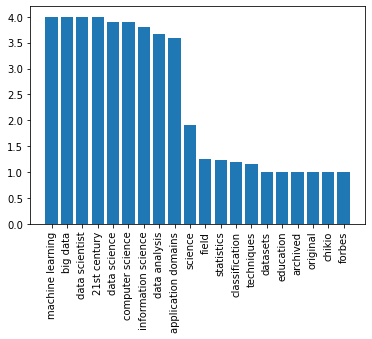

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

শব্দের ঘনত্ব চিত্রিত করার আরও ভালো উপায় রয়েছে - **ওয়ার্ড ক্লাউড** ব্যবহার করে। আমাদের কীওয়ার্ড তালিকা থেকে ওয়ার্ড ক্লাউড আঁকার জন্য আরেকটি লাইব্রেরি ইনস্টল করতে হবে।


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud` অবজেক্ট মূল পাঠ্য বা পূর্ব-গণনা করা শব্দের তালিকা তাদের ফ্রিকোয়েন্সি সহ গ্রহণ করার জন্য দায়ী, এবং একটি চিত্র প্রদান করে, যা পরে `matplotlib` ব্যবহার করে প্রদর্শিত হতে পারে:


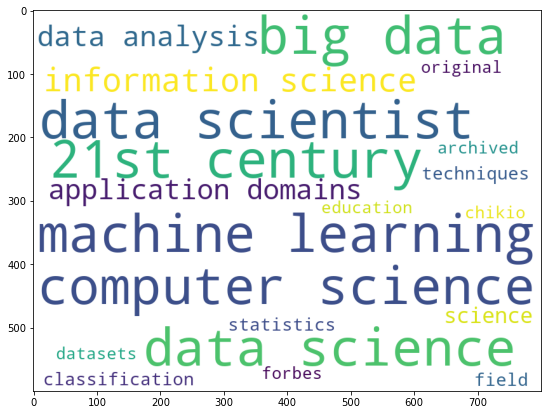

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

আমরা মূল পাঠ্যটিও `WordCloud`-এ পাস করতে পারি - চলুন দেখি আমরা কি একই রকম ফলাফল পেতে সক্ষম:


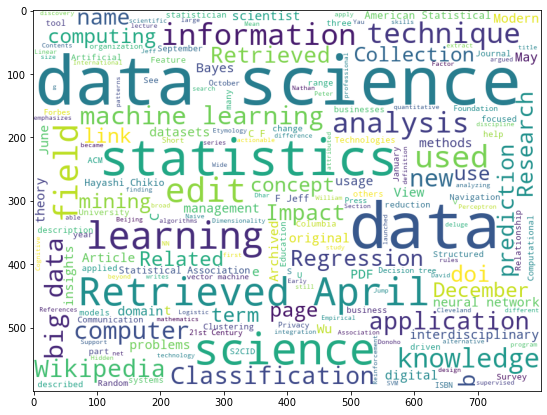

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

আপনি দেখতে পাচ্ছেন যে শব্দ মেঘ (word cloud) এখন আরও আকর্ষণীয় দেখাচ্ছে, তবে এটি অনেক অপ্রাসঙ্গিক শব্দও অন্তর্ভুক্ত করছে (যেমন `Retrieved on` এর মতো সম্পর্কহীন শব্দ)। এছাড়াও, আমরা কম সংখ্যক দুই-শব্দের কীওয়ার্ড পাচ্ছি, যেমন *data scientist* বা *computer science*। এর কারণ হলো RAKE অ্যালগরিদম পাঠ্য থেকে ভালো কীওয়ার্ড বাছাই করার ক্ষেত্রে অনেক ভালো কাজ করে। এই উদাহরণটি ডেটা প্রি-প্রসেসিং এবং পরিষ্কারের গুরুত্বকে তুলে ধরে, কারণ শেষ পর্যন্ত একটি পরিষ্কার চিত্র আমাদের আরও ভালো সিদ্ধান্ত নিতে সাহায্য করবে।

এই অনুশীলনে আমরা একটি সহজ প্রক্রিয়ার মধ্য দিয়ে গিয়েছি, যেখানে উইকিপিডিয়া পাঠ্য থেকে কীওয়ার্ড এবং শব্দ মেঘের আকারে কিছু অর্থ বের করার চেষ্টা করেছি। এই উদাহরণটি বেশ সহজ, তবে এটি একটি ডেটা সায়েন্টিস্ট সাধারণত ডেটা নিয়ে কাজ করার সময় যে ধাপগুলো অনুসরণ করেন, তা ভালোভাবে প্রদর্শন করে। এটি ডেটা সংগ্রহ থেকে শুরু করে ভিজ্যুয়ালাইজেশন পর্যন্ত সমস্ত ধাপকে অন্তর্ভুক্ত করে।

আমাদের কোর্সে আমরা এই সমস্ত ধাপগুলো বিস্তারিতভাবে আলোচনা করব।



---

**অস্বীকৃতি**:  
এই নথিটি AI অনুবাদ পরিষেবা [Co-op Translator](https://github.com/Azure/co-op-translator) ব্যবহার করে অনুবাদ করা হয়েছে। আমরা যথাসম্ভব সঠিক অনুবাদ প্রদানের চেষ্টা করি, তবে অনুগ্রহ করে মনে রাখবেন যে স্বয়ংক্রিয় অনুবাদে ত্রুটি বা অসঙ্গতি থাকতে পারে। মূল ভাষায় থাকা নথিটিকে প্রামাণিক উৎস হিসেবে বিবেচনা করা উচিত। গুরুত্বপূর্ণ তথ্যের জন্য, পেশাদার মানব অনুবাদ সুপারিশ করা হয়। এই অনুবাদ ব্যবহারের ফলে কোনো ভুল বোঝাবুঝি বা ভুল ব্যাখ্যা হলে আমরা দায়বদ্ধ থাকব না।
